In [1]:
#Pandas & Numpy
import pandas as pd 
import numpy as np

#Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the data from csv file to a Pandas DataFrame
dataset = pd.read_csv(r"C:\Users\master save\Downloads\archive (1)\medicalmalpractice.csv")

#Printing first 5 samples of data
print(dataset.head())

   Amount  Severity  Age  Private Attorney  Marital Status        Specialty  \
0   57041         7   62                 1               2  Family Practice   
1  324976         6   38                 1               2            OBGYN   
2  135383         4   34                 1               2       Cardiology   
3  829742         7   42                 1               1       Pediatrics   
4  197675         3   60                 0               2            OBGYN   

           Insurance  Gender  
0            Private    Male  
1       No Insurance  Female  
2            Unknown    Male  
3       No Insurance  Female  
4  Medicare/Medicaid  Female  


In [3]:
num_rows,num_cols = dataset.shape
print(f"# of rows: {num_rows}")
print(f"# of columns: {num_cols}")

# of rows: 79210
# of columns: 8


In [4]:
#Getting informations about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79210 entries, 0 to 79209
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Amount            79210 non-null  int64 
 1   Severity          79210 non-null  int64 
 2   Age               79210 non-null  int64 
 3   Private Attorney  79210 non-null  int64 
 4   Marital Status    79210 non-null  int64 
 5   Specialty         79210 non-null  object
 6   Insurance         79210 non-null  object
 7   Gender            79210 non-null  object
dtypes: int64(5), object(3)
memory usage: 4.8+ MB


In [5]:
#Checking for NaN values
dataset.isna().sum()

Amount              0
Severity            0
Age                 0
Private Attorney    0
Marital Status      0
Specialty           0
Insurance           0
Gender              0
dtype: int64

In [6]:
#For Private Attorney Column
dataset['Private Attorney'].replace(0, 'Not Private', inplace=True)
dataset['Private Attorney'].replace(1, 'Private', inplace=True)

#For Matiral Status Column 
dataset['Marital Status'].replace(0, 'Divorced', inplace=True)
dataset['Marital Status'].replace(1, 'Single', inplace=True)
dataset['Marital Status'].replace(2, 'Married', inplace=True)
dataset['Marital Status'].replace(3, 'Widowed', inplace=True)
dataset['Marital Status'].replace(4, 'Unknown', inplace=True)

#Showing First 5 rows
dataset.head()

C:\Users\master save\AppData\Local\Temp\ipykernel_3548\3003482383.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Private Attorney'].replace(0, 'Not Private', inplace=True)
C:\Users\master save\AppData\Local\Temp\ipykernel_3548\3003482383.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
0,57041,7,62,Private,Married,Family Practice,Private,Male
1,324976,6,38,Private,Married,OBGYN,No Insurance,Female
2,135383,4,34,Private,Married,Cardiology,Unknown,Male
3,829742,7,42,Private,Single,Pediatrics,No Insurance,Female
4,197675,3,60,Not Private,Married,OBGYN,Medicare/Medicaid,Female


# Exploratory Data Analysis (EDA)


In [7]:
dataset.describe(include='all')

,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
count,79210.000000,79210.000000,79210.000000,79210,79210,79210,79210,79210
unique,NaN,NaN,NaN,2,5,20,5,2
top,NaN,NaN,NaN,Private,Married,Family Practice,Private,Female
freq,NaN,NaN,NaN,52349,41220,11436,34289,47770
mean,157484.554816,4.799659,42.701868,NaN,NaN,NaN,NaN,NaN
std,193135.093293,2.083439,19.811063,NaN,NaN,NaN,NaN,NaN
min,1576.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,43670.250000,3.000000,28.000000,NaN,NaN,NaN,NaN,NaN
50%,98131.000000,4.000000,43.000000,NaN,NaN,NaN,NaN,NaN
75%,154675.250000,7.000000,58.000000,NaN,NaN,NaN,NaN,NaN


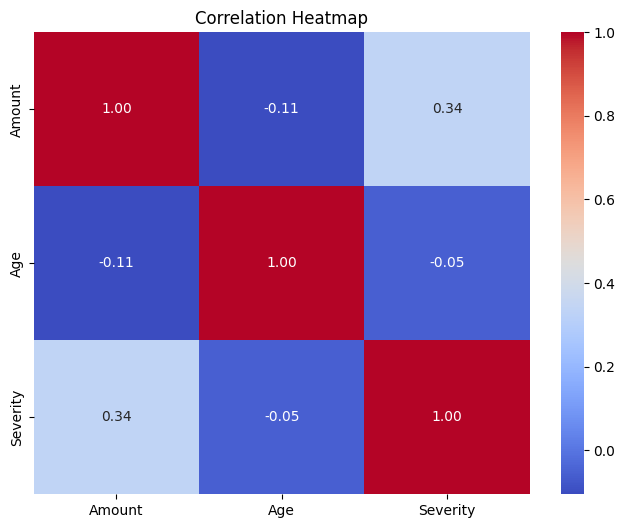

In [8]:
# Selecting only the numerical columns
numerical_data = dataset[['Amount', 'Age','Severity']]

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

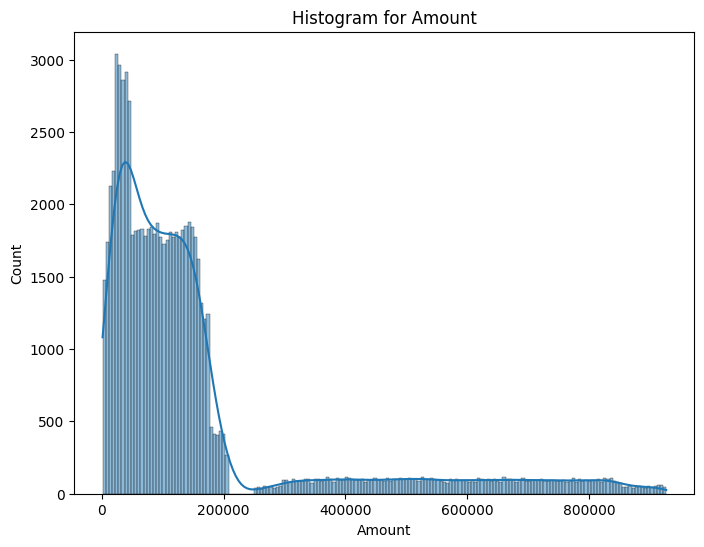

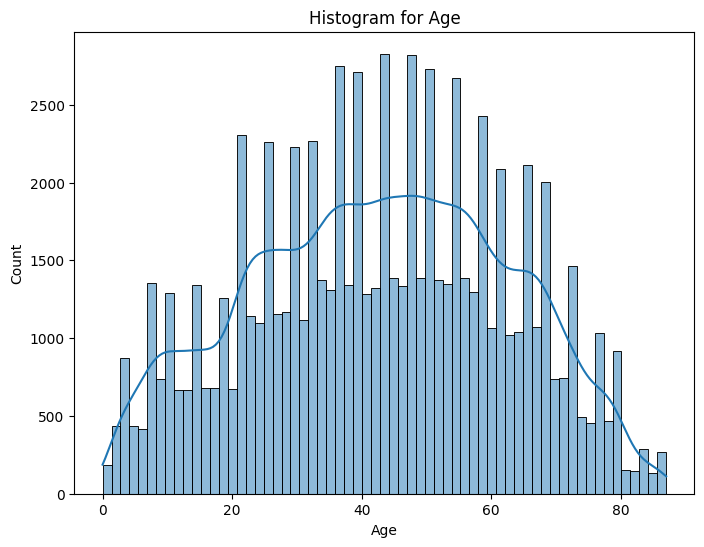

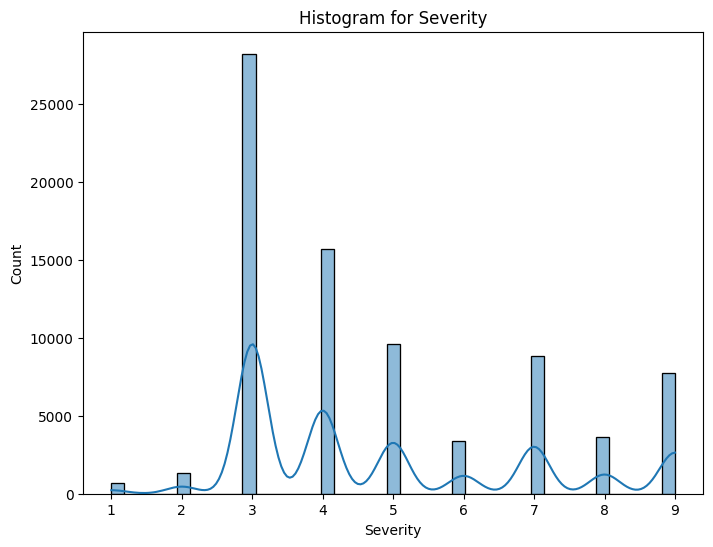

In [9]:
numeric_columns = ['Amount', 'Age','Severity']
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=dataset, x=column, kde=True)
    plt.title(f'Histogram for {column}')
    plt.show()

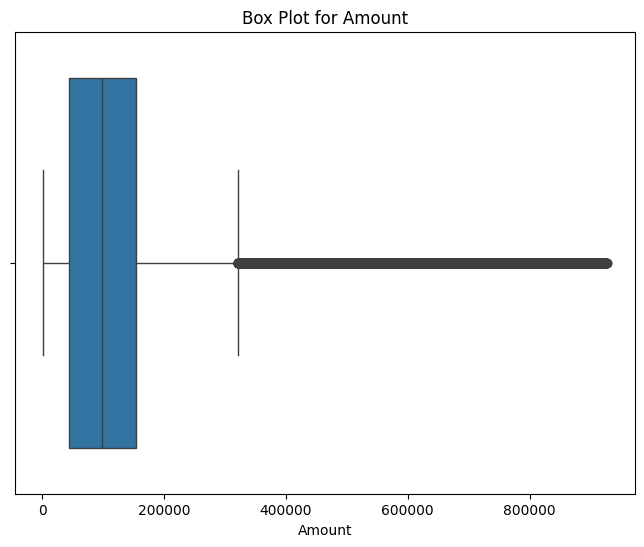

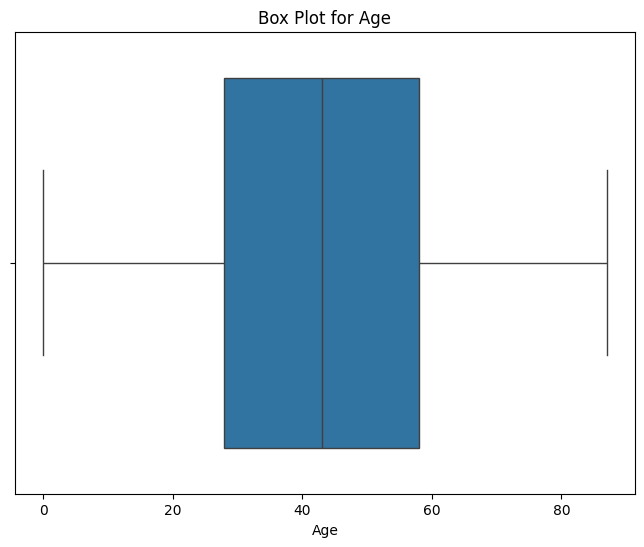

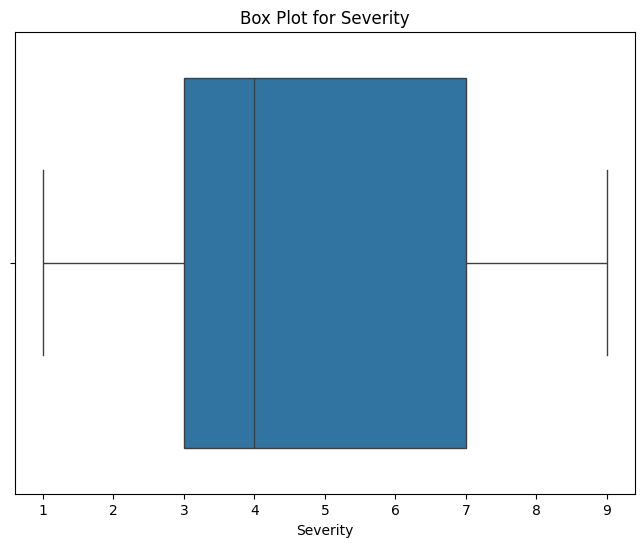

In [10]:
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=dataset, x=column)
    plt.title(f'Box Plot for {column}')
    plt.show()

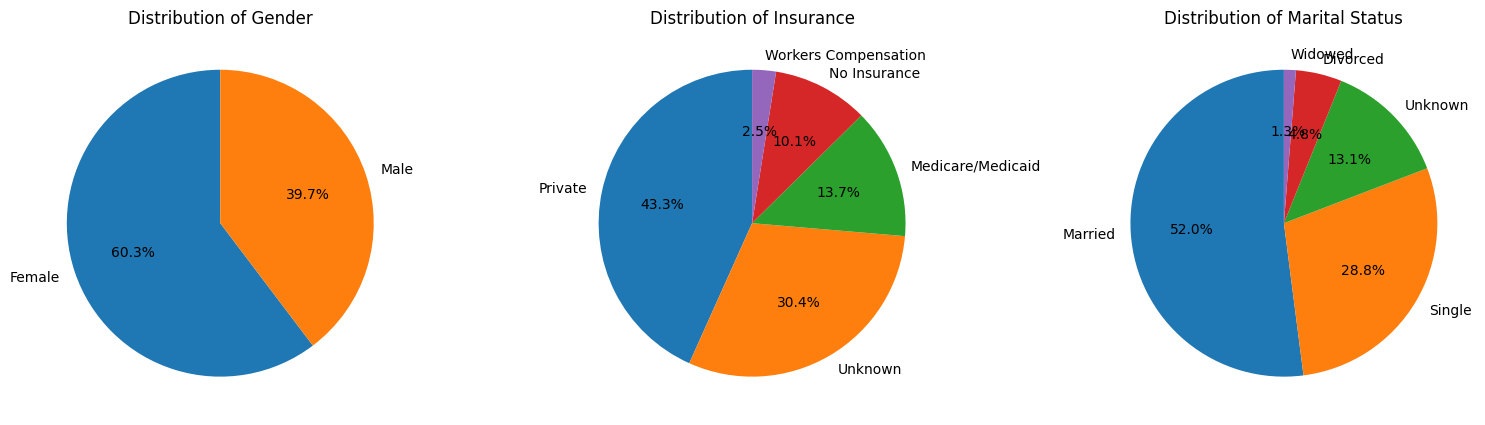

In [11]:
# Categorical columns to visualize
categorical_columns = ['Gender', 'Insurance', 'Marital Status']

# Creating subplots for the pie charts
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(15, 5))

for i, column in enumerate(categorical_columns):
    # Counting the frequency of each category
    category_counts = dataset[column].value_counts()
    
    # Creating a pie chart
    axes[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Distribution of {column}')
    
# Adjusting the layout and show the pie charts
plt.tight_layout()
plt.show()

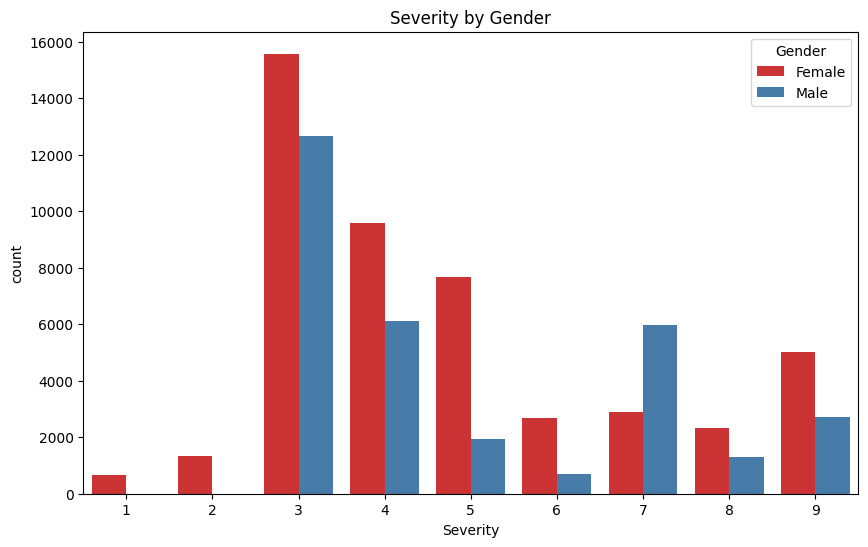

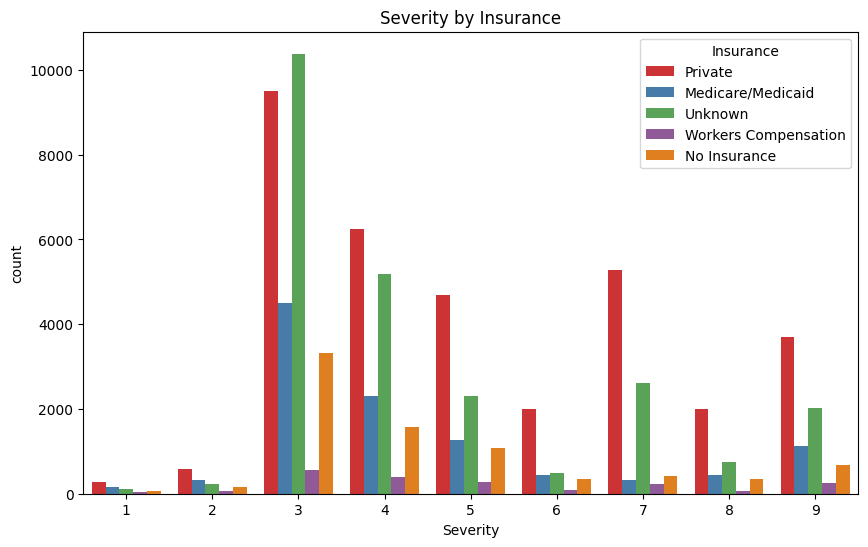

In [12]:
cat_features = ['Gender','Insurance']
for cat_feature in cat_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dataset, x='Severity', hue=cat_feature, palette='Set1')
    plt.title(f'Severity by {cat_feature}')
    plt.show()    

In [13]:
# Group by 'Specialty' and calculate the sum of 'Amount' for each specialty
specialty_amount = dataset.groupby('Specialty')['Amount'].sum().reset_index()

# Sortomg the DataFrame in descending order based on 'Amount' and get the top 3 specialties
top_3_specialties = specialty_amount.sort_values(by='Amount', ascending=False).head(3)

# Displaying the top 3 specialties with the highest 'Amount'
print(top_3_specialties)

         Specialty      Amount
4  Family Practice  2438914425
8            OBGYN  1944511931
5  General Surgery  1246180749


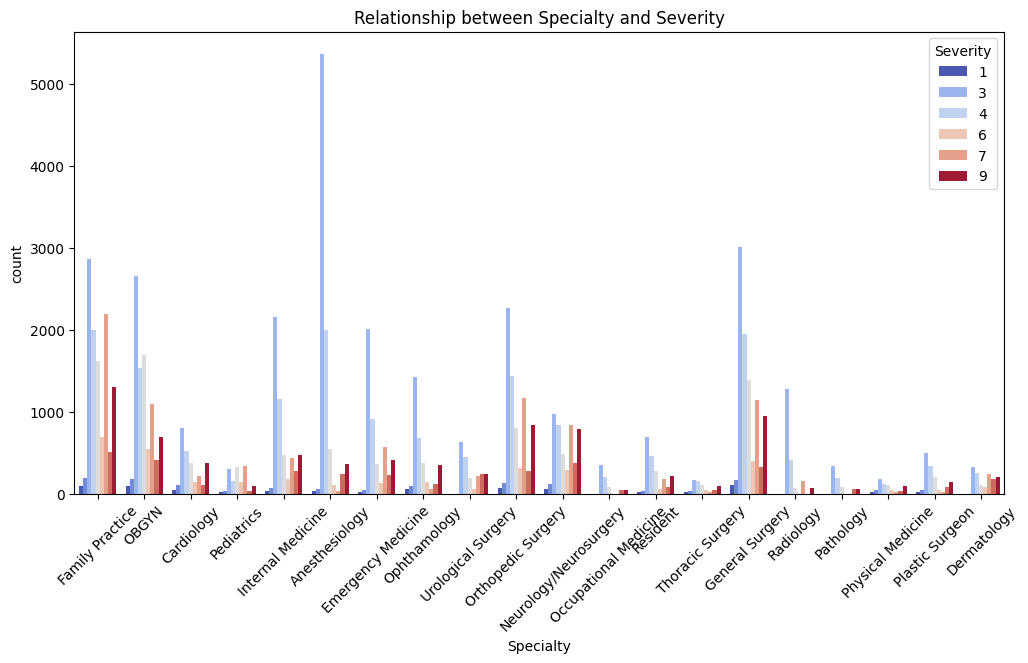

In [14]:
# Creating a count plot of 'Specialty' grouped by 'Severity'
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='Specialty', hue='Severity', palette='coolwarm')
plt.title('Relationship between Specialty and Severity')
plt.xticks(rotation=45)
plt.show()